In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# LoRA weights ~3 MB
model_path = "./pokemon/pokemon-lora.pt"

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.to("mps")
pipe.unet.load_attn_procs(model_path)

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

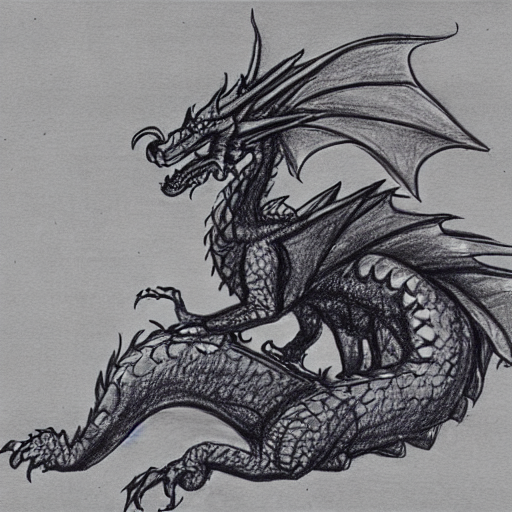

In [4]:
prompt = "a drawing of a dragon sitting on its hind legs"

# First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt, num_inference_steps=25).images[0]
image